# Time Series Modelling

# Practice

In [1]:
#importing required liabraries

import pandas as pd   #for working with datasets
import matplotlib.pyplot as plt #for visualization

## Task 1 : Data Preprocessing

### Task 1.1 : Load the dataset into Pandas data frame

In [2]:
#Data Loading
weather_df = pd.read_csv(r'C:\Users\Admin\Desktop\Level -1\C1\Repository\DS3_C1_S2_Weather_Data_Practice.csv')

weather_df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [3]:
# setting date as index

weather_df = weather_df.set_index('Date')

### Task 1.2 : Use the rolling average to achieve a smooth plot of the data

In [4]:
Temperature = weather_df['Temp']
Temperature.head()

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Temp, dtype: float64

In [5]:
lags = 6     # Setting value of lag as 6

moving_avg = Temperature.rolling(window=lags).mean()

In [6]:
df_ts = pd.DataFrame({"Actual" : weather_df['Temp'] , "MA" : moving_avg})

print(df_ts)

            Actual         MA
Date                         
1981-01-01    20.7        NaN
1981-01-02    17.9        NaN
1981-01-03    18.8        NaN
1981-01-04    14.6        NaN
1981-01-05    15.8        NaN
...            ...        ...
1990-12-27    14.0  13.100000
1990-12-28    13.6  13.166667
1990-12-29    13.5  13.100000
1990-12-30    15.7  14.050000
1990-12-31    13.0  14.066667

[3650 rows x 2 columns]


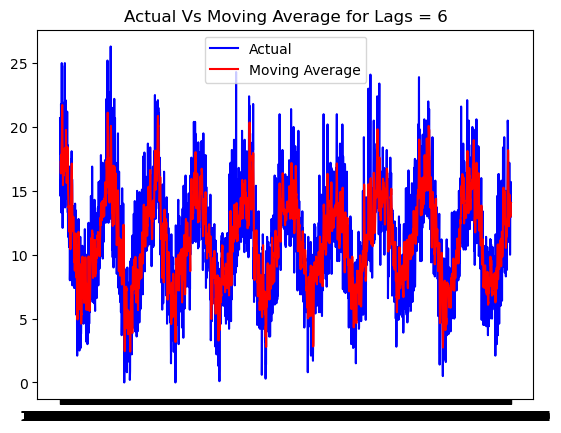

In [7]:
# plotting actual and moving average for comparison

plt.plot(df_ts.Actual, color='blue', label='Actual')
plt.plot(df_ts.MA, color='red', label='Moving Average')
plt.title('Actual Vs Moving Average for Lags = ' + str(lags))
plt.legend()
plt.show()

Moving average is used to smoothen the data by constantly creating updated average data.From the visuals it is seen moving average line is bit smoother than actal data. It means noise has been reduced a bit. 

This technique can be used with different lag values.

## Task 2 : Charactercteristics of Time Series

### Investigate wheather dataset contains any trend or seasonality

In [8]:
Temperature = weather_df['Temp']
print(Temperature.head())

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Temp, dtype: float64


In [1]:
from statsmodels.tsa.seasonal import seasonal_decompose #splitting time series data into several components trend, seasonal and residual

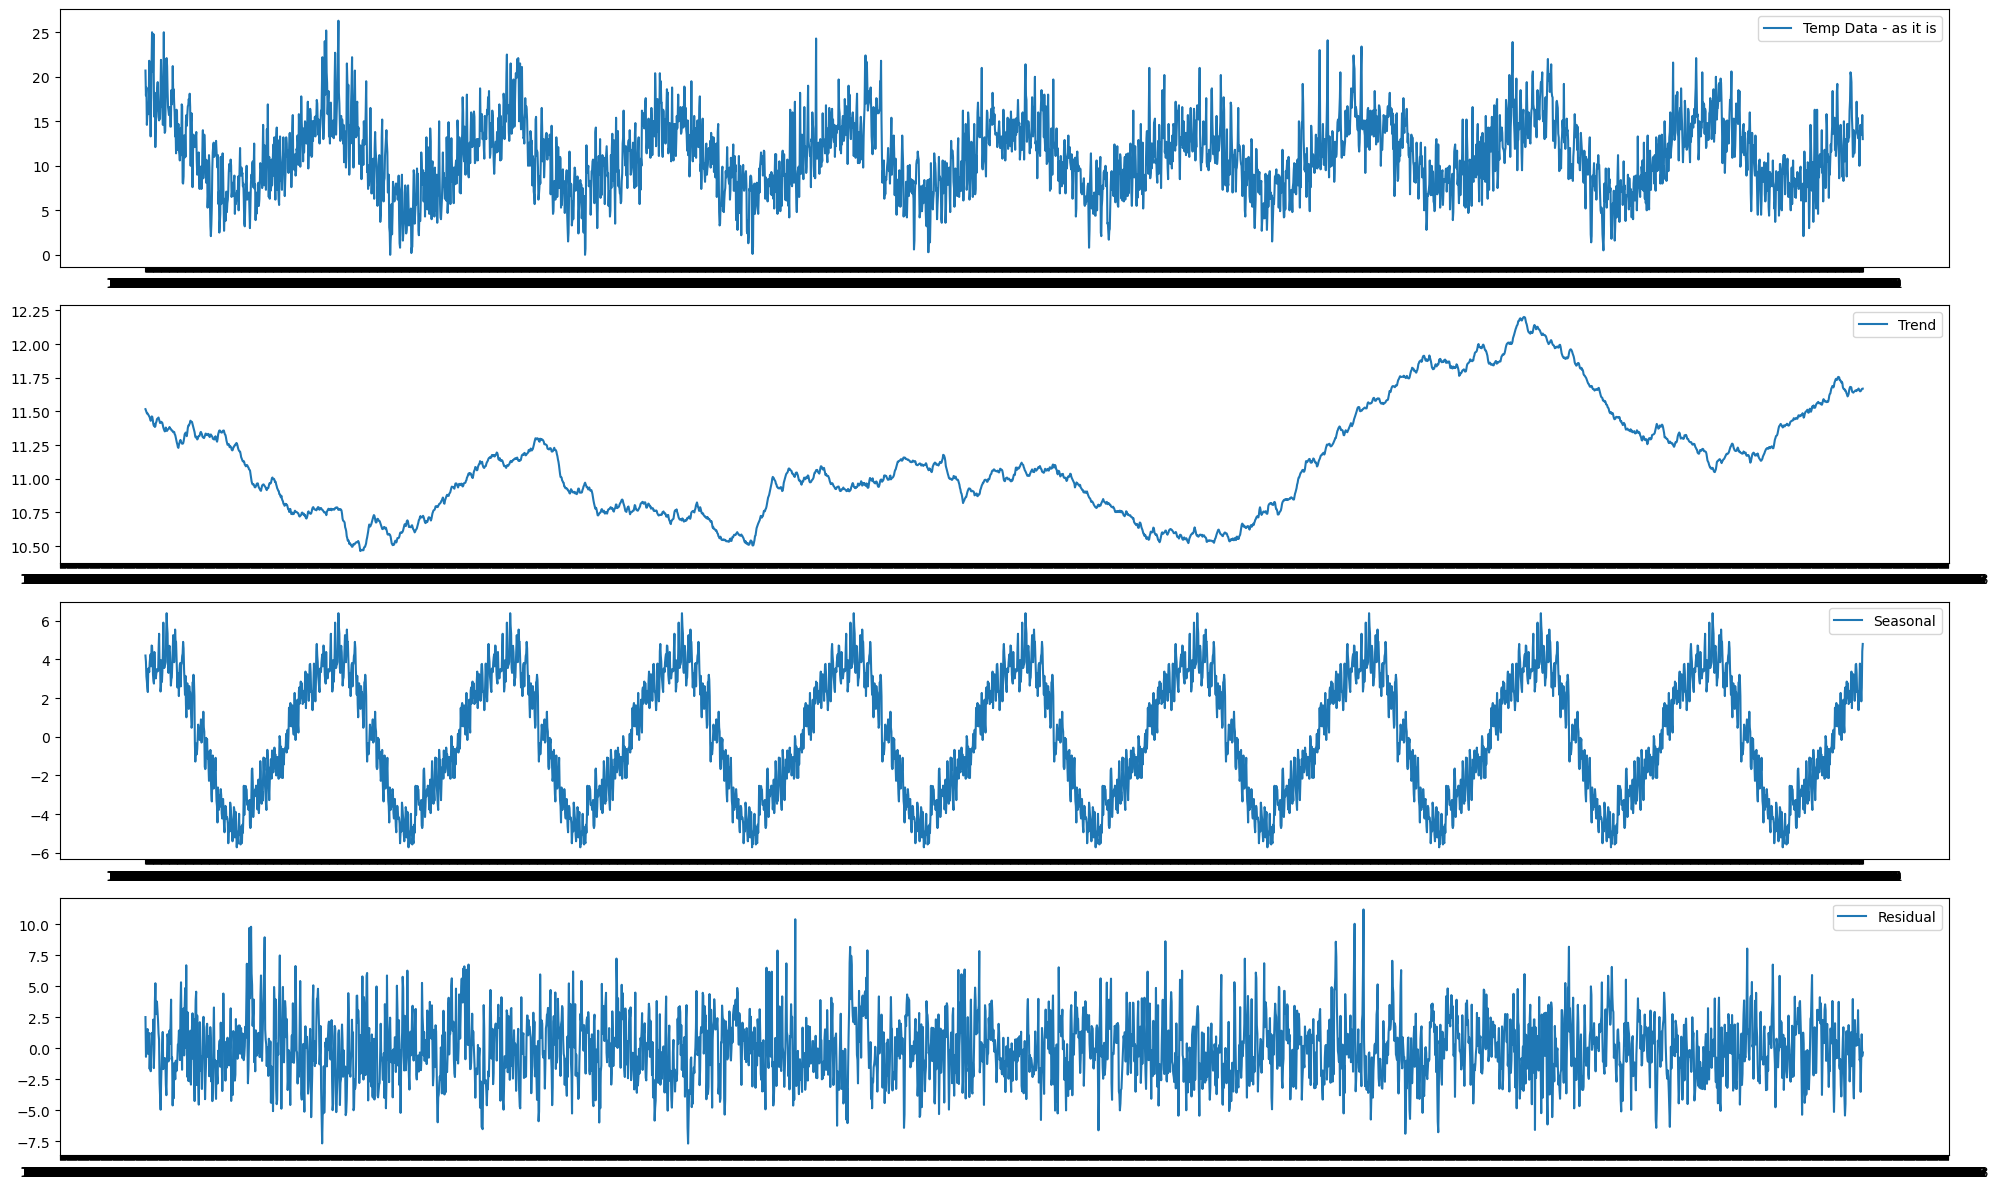

In [10]:
# different components of the Time series data
# period = 365 since the data is monthly

decomposition=seasonal_decompose(Temperature, period=365)
d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid

#Seasonal decompose tells us what components are available in time series data.

# plotting all the 4 graphs
fig,ax = plt.subplots(4,1,figsize=(20,12))

plt.subplot(411) #4rows 1col 1st position
plt.plot(Temperature,label='Temp Data - as it is')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend(loc='best')

plt.tight_layout()

Any time series data is a combination of four components. Secular(trend), Cyclic,Seasonal and Irregular. From the visuals data is showing upward trend and also seasonal trend as pattern is repeating after specific time interval.

## Task 3 : Check for Data Stationarity

### Determine wheather the data is stationary. If not make the data stationary with the process of differentiation

In [11]:
# dickey fuller test for stationary check

from statsmodels.tsa.stattools import adfuller

In [12]:
# ADF test to determine data stationarity

def checkStationarity(data):
    pvalue = adfuller(data['Temp'])[1]
    print(pvalue)


    if pvalue < 0.05:
        msg = "pvalue={}. Data is Stationary. Proceed to Model Building".format(pvalue)
    else:
        msg = "pvalue={}. Data is not Stationary. Make the data stationary before Model Building".format(pvalue)
    
    return msg


In [13]:
# Calling function

print(checkStationarity(weather_df))

0.0002470826300361149
pvalue=0.0002470826300361149. Data is Stationary. Proceed to Model Building


## Task 4 : Smooth the Data

### Figure out the smoothing technique that works best for the dataset in order to forecast temperature.

#### Simple Exponent Smoothing (no trend/seasonality) 

In [14]:
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import ExponentialSmoothing

import warnings
warnings.filterwarnings('ignore')

In [15]:
# Simple Exponent - when there is no trend/seasonality

def simplesmoothing(data,alpha):
    model = SimpleExpSmoothing(data).fit(smoothing_level=alpha,optimized=False)
    pdct = model.fittedvalues
    df = pd.DataFrame({'actual' : data, 'forecast' : pdct})
    return(model,df)

In [16]:
data = weather_df['Temp']

In [17]:
# creating forecast for different values of alpha. Plot and understand the charts

# dictionary to store the forecast for each alpha
d_simple_exp = {}
alphas = [0, 0.2, 0.6, 0.8]

for a in alphas:
    model,df = simplesmoothing(data,a)
    d_simple_exp[a] = df.forecast

d_simple_exp

{0: Date
 1981-01-01    20.7
 1981-01-02    20.7
 1981-01-03    20.7
 1981-01-04    20.7
 1981-01-05    20.7
               ... 
 1990-12-27    20.7
 1990-12-28    20.7
 1990-12-29    20.7
 1990-12-30    20.7
 1990-12-31    20.7
 Name: forecast, Length: 3650, dtype: float64,
 0.2: Date
 1981-01-01    20.700000
 1981-01-02    20.700000
 1981-01-03    20.140000
 1981-01-04    19.872000
 1981-01-05    18.817600
                 ...    
 1990-12-27    13.448916
 1990-12-28    13.559133
 1990-12-29    13.567306
 1990-12-30    13.553845
 1990-12-31    13.983076
 Name: forecast, Length: 3650, dtype: float64,
 0.6: Date
 1981-01-01    20.700000
 1981-01-02    20.700000
 1981-01-03    19.020000
 1981-01-04    18.888000
 1981-01-05    16.315200
                 ...    
 1990-12-27    13.695645
 1990-12-28    13.878258
 1990-12-29    13.711303
 1990-12-30    13.584521
 1990-12-31    14.853809
 Name: forecast, Length: 3650, dtype: float64,
 0.8: Date
 1981-01-01    20.700000
 1981-01-02    20.7000

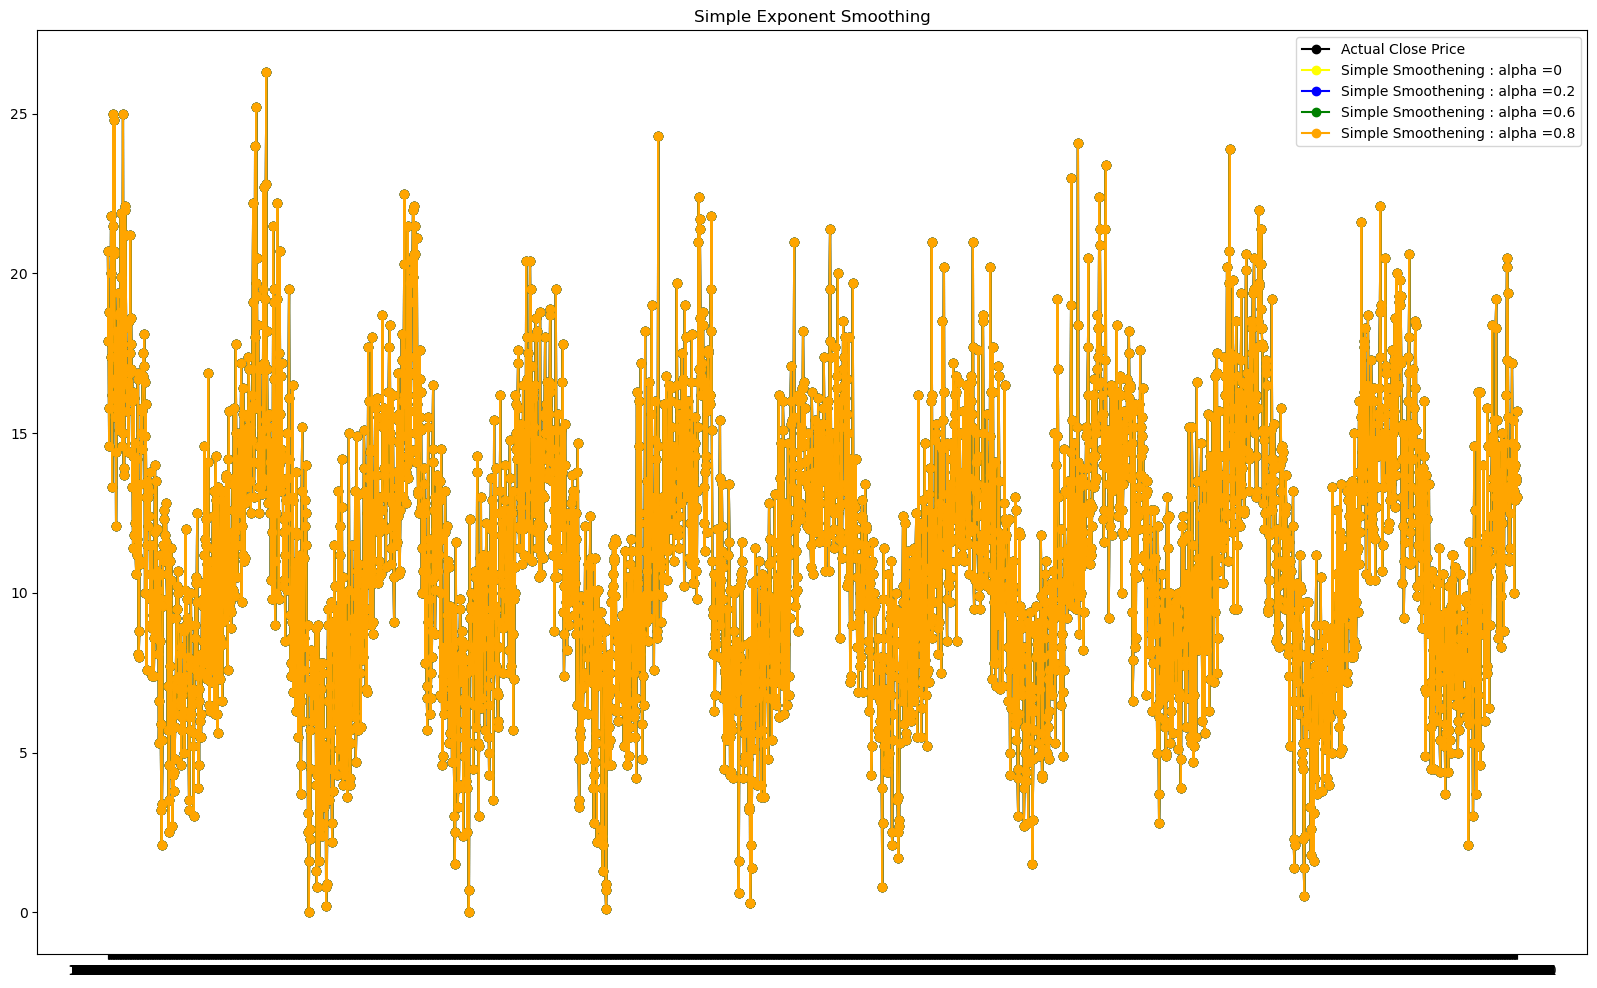

In [18]:
colors = ['yellow','blue','green','orange']

# plotting the actual and forecast data

fig,ax = plt.subplots(1,1,figsize=(20,12))
plt.plot(data, marker='o', color='black',label='Actual Close Price')

for i in range(len(alphas)):
    plt.plot(data, marker='o', color=colors[i], label='Simple Smoothening : alpha =' + str(alphas[i]))

plt.title('Simple Exponent Smoothing')
plt.legend()
plt.show()

In the above time series plot using simple exponent smoothing we can observe that the higher the value of alpha has a more fitted line tahn the other line with respect to actual close price line. This line adjust to the changing condition more smoothly.  

#### Double Exponent Smoothing (trend, but no seasonality)

In [19]:
# Double Exponent - when there is a trend, no seasonality (Holts' method) 
# parameters: alpha, beta

model = ExponentialSmoothing(data,trend='additive').fit(smoothing_level=0.2, smoothing_slope=0.5)

"""The additive model is useful when the seasonal variation is relatively constant over time.
The multiplicative model is useful when the seasonal variation increases over time."""

# forecast with double exponent smoothing
f_dexp = model.fittedvalues
print(f_dexp)

Date
1981-01-01    16.180356
1981-01-02    17.000558
1981-01-03    17.186664
1981-01-04    17.676882
1981-01-05    16.921368
                ...    
1990-12-27    13.729330
1990-12-28    13.645129
1990-12-29    13.493255
1990-12-30    13.352431
1990-12-31    13.914528
Length: 3650, dtype: float64


Text(0.5, 1.0, 'Double Exponent Smoothing')

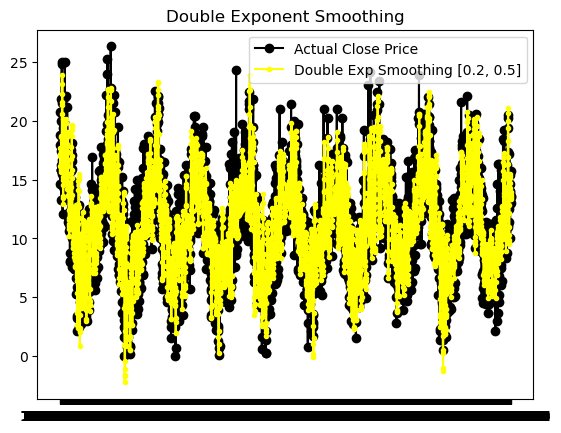

In [20]:
# plot the actual and smooth data

plt.plot(data,marker='o',color='black',label='Actual Close Price')
plt.plot(f_dexp, marker='.',color='yellow',label='Double Exp Smoothing [0.2, 0.5]')
plt.legend()
plt.title('Double Exponent Smoothing')

#### Triple Exponent Smoothing (trend and seasonality)

In [21]:
# build model

model =ExponentialSmoothing(data,trend='add',seasonal='add',seasonal_periods=365).fit()
print(model)

Text(0.5, 1.0, 'Triple Exponent Smoothing')

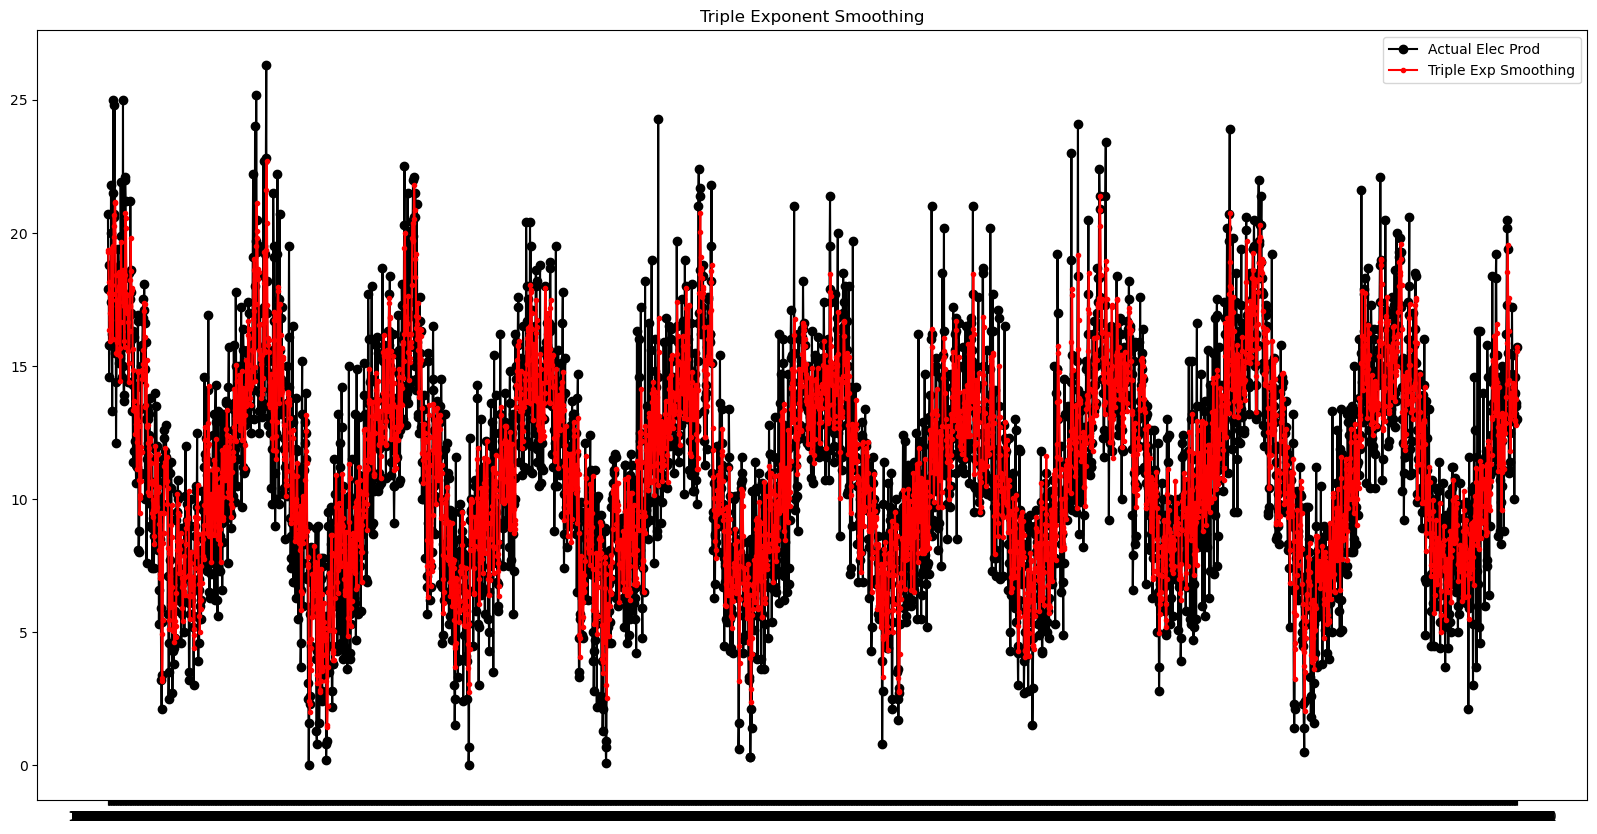

In [22]:
# plot the actual and triple smoothing values

ax=plt.subplots(figsize = (20,10))
plt.plot(data, marker='o', color='black', label='Actual Elec Prod')
plt.plot(model.fittedvalues, marker='.',color='red',label='Triple Exp Smoothing')
plt.legend()

plt.title('Triple Exponent Smoothing')

From the visualization we can see that Triple Exponent Smoothing Technique work best for the dataset as graph is smoother (less strokes) than Double and Simple Exponent Smoothing Technique.
Also from Task 2, we have found that data has both trend and seasonality and Triple Exponent Smoothing Technique is used to smoothen the data that has both trend and seasonality.So Triple Exponent Smoothing will work best in order to forecast the temperature.